<a href="https://colab.research.google.com/github/Panchagiri-vidyasri/data-analysis-using-python_2116/blob/main/DAUP_PROJECT(Images)24_03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import cv2
from sklearn.model_selection import train_test_split
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Data  

In [ ]:
dataset_path = "/content/drive/MyDrive/images"
train_path = "/content/drive/MyDrive"
val_path = "/content/drive/MyDrive"
for folder in [train_path, val_path]:
    if not os.path.exists(folder):
        os.makedirs(folder)

# Get class names (subfolders)
classes = os.listdir(dataset_path)

# Split and move images
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)

    # Split dataset (80% Train, 20% Validation)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create class directories
    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_path, class_name), exist_ok=True)

    # Move images
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_path, class_name, img))
    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_path, class_name, img))

print("Dataset split completed!")


Dataset split completed!


In [ ]:
data_dir_train = '/content/drive/MyDrive/art and culture'
data_dir_test = '/content/drive/MyDrive/art and culture'


In [ ]:


import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define paths (Ensure these paths are correct)
data_dir_train = '/content/drive/MyDrive/images'
data_dir_test = '/content/drive/MyDrive/images'

# Define parameters
batch_size = 32
img_size = (256, 256)

# Load training dataset
train_ds = image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size
)

# Load testing dataset
test_ds = image_dataset_from_directory(
    data_dir_test,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size
)

print("Dataset loaded successfully!")


Found 3021 files belonging to 3 classes.
Found 3021 files belonging to 3 classes.
Dataset loaded successfully!


Step 4: Visualize a Batch of Data

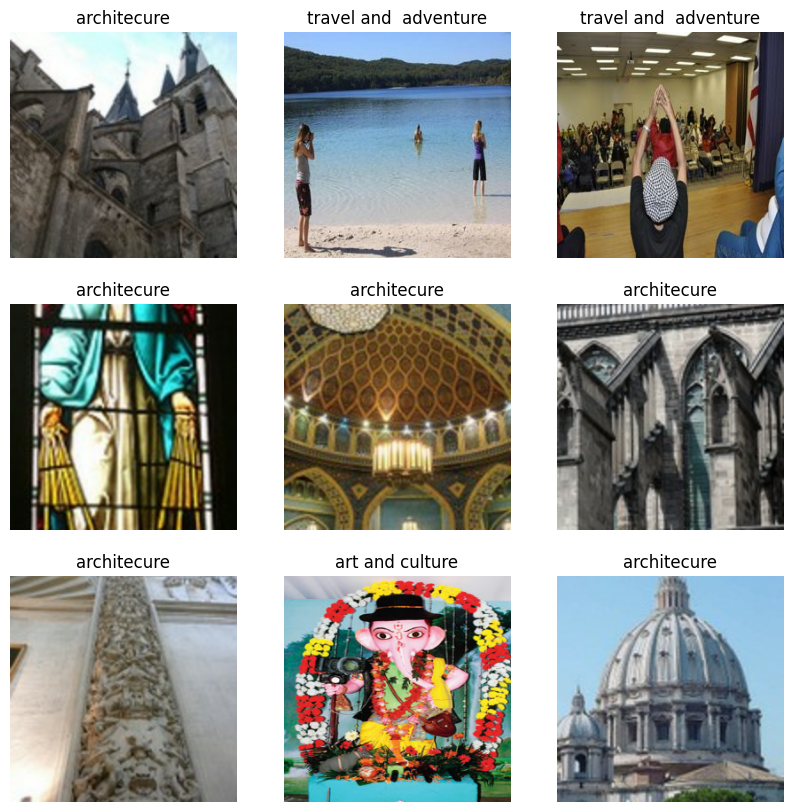

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
        plt.title(class_names[tf.argmax(labels[i]).numpy()])
        plt.axis("off")


Step 5: Optimize the Dataset for Training

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rgb_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

dataset_path = "/content/drive/MyDrive/images"
BATCH_SIZE = 32
IMG_HEIGHT_256 = 256
IMG_WIDTH_256 = 256
IMG_HEIGHT_200 = 200
IMG_WIDTH_200 = 200


train_rgb_generator_256 = rgb_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT_256, IMG_WIDTH_256),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

train_rgb_generator_200 = rgb_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT_200, IMG_WIDTH_200),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

Found 2417 images belonging to 3 classes.
Found 604 images belonging to 3 classes.


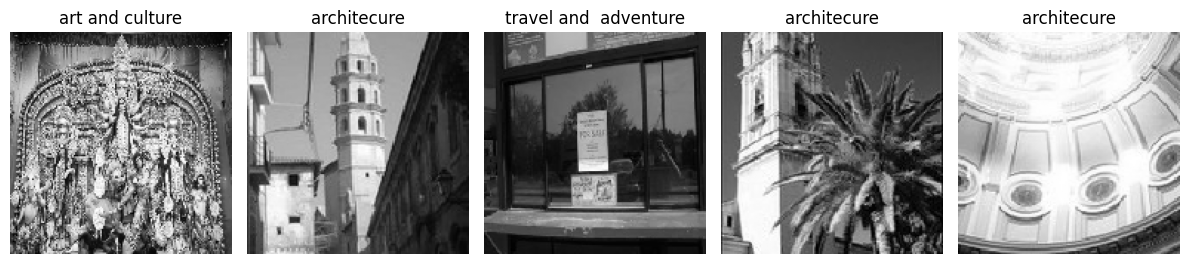

In [ ]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

gray_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gray_generator = gray_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

val_gray_generator = gray_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

def display_gray_images(generator, num_images=5):
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())

    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        label_index = np.argmax(labels[i])
        plt.title(class_labels[label_index])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_gray_images(train_gray_generator, num_images=5)

Found 2417 images belonging to 3 classes.


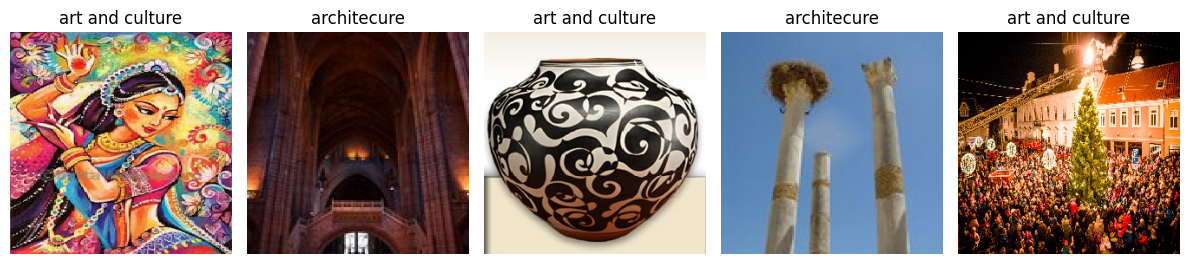

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT = 256
IMG_WIDTH = 256
BATCH_SIZE = 32

dataset_path = "/content/drive/MyDrive/images"

rgb_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_rgb_generator = rgb_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

def display_rgb_images(generator, num_images=5):
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())

    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        label_index = labels[i].argmax()
        plt.title(class_labels[label_index])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_rgb_images(train_rgb_generator, 5)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the feature maps
    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(len(class_names), activation='softmax') # Output layer should have the same number of neurons as classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      31,490,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,509,955 (120.20 MB)

 Trainable params: 31,509,955 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)


Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 534s 6s/step - accuracy: 0.4828 - loss: 314.1142 - val_accuracy: 0.7832 - val_loss: 0.6430
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 530s 6s/step - accuracy: 0.7583 - loss: 0.6772 - val_accuracy: 0.8997 - val_loss: 0.3393
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 558s 6s/step - accuracy: 0.8660 - loss: 0.4228 - val_accuracy: 0.9490 - val_loss: 0.1714
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 528s 6s/step - accuracy: 0.9179 - loss: 0.2469 - val_accuracy: 0.9537 - val_loss: 0.1892
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 522s 6s/step - accuracy: 0.9315 - loss: 0.2071 - val_accuracy: 0.9341 - val_loss: 0.2424
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 519s 5s/step - accuracy: 0.9424 - loss: 0.1727 - val_accuracy: 0.9288 - val_loss: 0.2482
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 562s 5s/step - accuracy: 0.9358 - loss: 0.2175 - val_accuracy: 0.9778 - val_loss: 0.0864
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 559s 5s/step - accuracy: 0.9475 - loss: 0.1750 - val_accuracy: 0.9834 -

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


95/95 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9893 - loss: 0.0262
Test Loss: 0.028922835364937782
Test Accuracy: 0.9880834221839905


Model saved successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


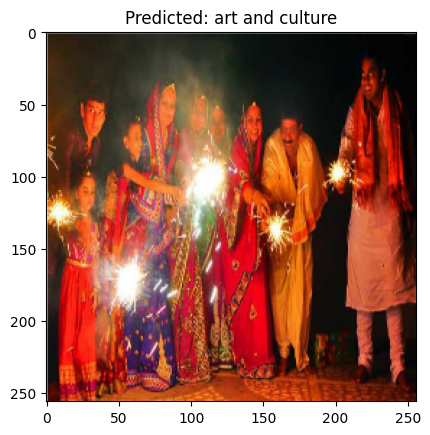

In [ ]:
# Save the model
model.save('cnn_model.h5')
print("Model saved successfully!")

# Predict on a batch of test images
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Predicted: {class_names[tf.argmax(predictions[1]).numpy()]}")
    plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        22
           1       0.56      0.56      0.56        18

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



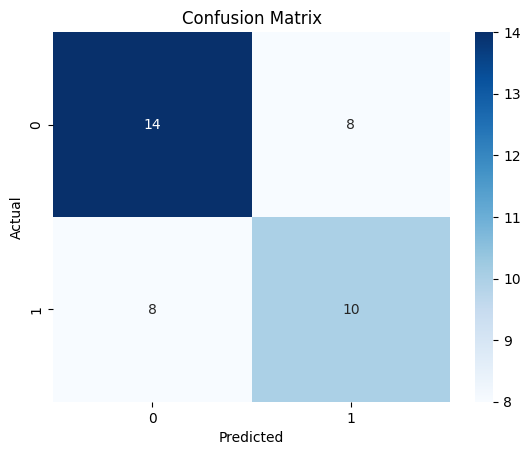

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import ttest_ind, norm, f_oneway
from statsmodels.stats.weightstats import ztest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Sample Data Generation
np.random.seed(42)
X = np.random.rand(200, 5)
y = np.random.choice([0, 1], size=200)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

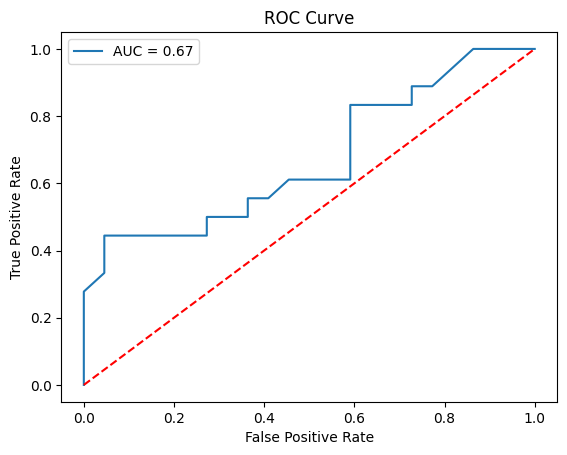

In [ ]:


# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



In [ ]:
# Z-Test
sample1 = np.random.normal(50, 10, 100)
sample2 = np.random.normal(52, 10, 100)
z_stat, p_value = ztest(sample1, sample2)
print(f"Z-Test: Z-stat = {z_stat:.2f}, p-value = {p_value:.4f}")

# T-Test
t_stat, p_ttest = ttest_ind(sample1, sample2)
print(f"T-Test: T-stat = {t_stat:.2f}, p-value = {p_ttest:.4f}")

# ANOVA Test
sample3 = np.random.normal(48, 10, 100)
anova_stat, p_anova = f_oneway(sample1, sample2, sample3)
print(f"ANOVA Test: F-stat = {anova_stat:.2f}, p-value = {p_anova:.4f}")


Z-Test: Z-stat = -0.41, p-value = 0.6802
T-Test: T-stat = -0.41, p-value = 0.6806
ANOVA Test: F-stat = 2.38, p-value = 0.0942
